# Union-Find

- develop mathematical models to help us understand the properties of the algorithms we're developing
- test those models through experimentation enabling us to improve algorithms
- iterate enough times to get more refined models until we get what we need to solve practical problems of interest

Given a set of N objects:
- union: connect two objects
- find: is there a path connecting the two objects?

```java
union(4, 3)
union(3, 8)
union(6, 5)
union(9, 4)
union(2, 1)
union(5, 0)
union(7, 2)
union(6, 1)
union(1, 0)
connected(0, 7) //?
```

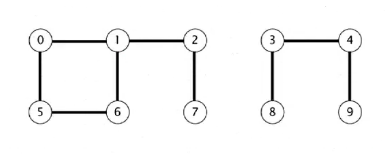

We'll only explore whether or not the objects are connected, not the path in which they are connected.

## Dynamic Connectivity

We assume "is connected to" is an **equivalence relation**:
- reflexive: p is connected to p
- symmetric: if p is connected to q, q is connected to p
- transitive: if p is connected to q and q is connected to r, then p is connected to r

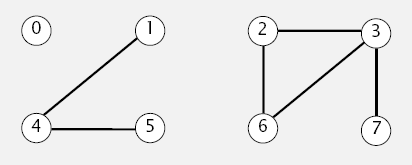

**connected components**: maximal set of objects that are mutually connected.

`{0}`, `{1, 4, 5}`, and `{2, 3, 6, 7}`

### implementing the operations

1. `find query`: check if two objects are in the same component
2. `union command`: replace components containing two objects with their union

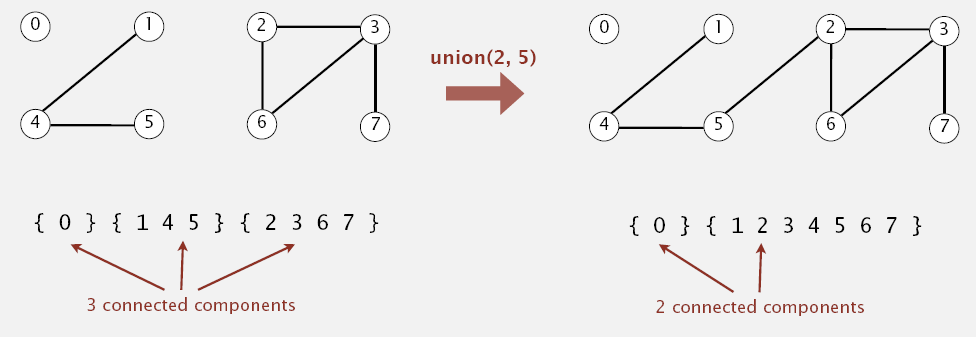

### union-find data type (api)

goal: design efficient data structure for union-find
- number of objects N can be huge
- number of operations M can be huge
- `find queries` and `union commands` may be intermixed

how to achieve:
- read in number of objects N from standard input
- repeat:
    - read in pair of integers from standard input
    - if they are not yet connected, connect them and print out pair

## Quick-find [eager approach]

data structure:
- integer array of size N
- p and q are connected iff they have same id

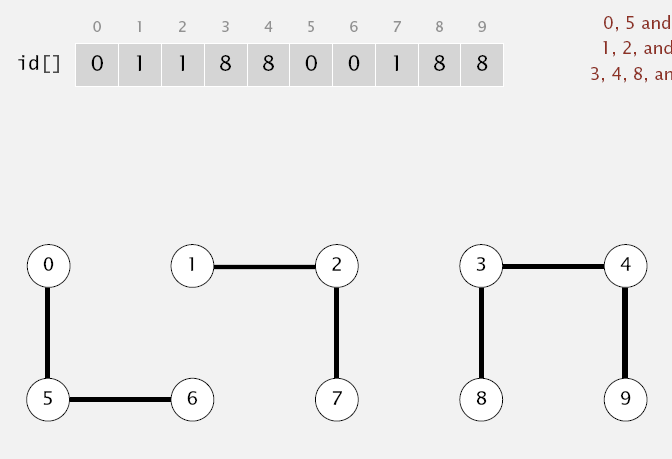

`find`: check if p and q have the same id  
`union`: to merge components containing p and q, change all entries whose id equals `id[q]` to `id[p]`

In [8]:
public class QuickFindUF                // classes have capitalized names
{
  // private integer array id
  private int[] id;                   

  // populates array with index up to N
  // N array accesses
  public QuickFindUF(int N)           
  {
    id = new int[N];
    for (int i = 0; i < N; i++)
      id[i] = i;
  }

  // returns whether ids are the same
  // 2 array accesses
  public boolean connected(int p, int q)
  {
    return (id[p] == id[q]);
  }

  // change all id[p] to id[q]
  // 2N + 2 array accesses
  public void union(int p, int q)
  {
    int pid = id[p];
    int qid = id[q];
    for (int i=0; i < id.length; i++)
      // caution: why wouldn't it work with id[i] == id[p]?
      if (id[i] == pid)
          id[i] = qid;
  }
}

This algorithm is too slow.

- initialize: N accesses
- union: N accesses
- quadratic time!

> Quadratic time is much too slow!

## Quick-Union [lazy approach]

data structure:
- integer array of size N
- "tree-root" data structure
- id[i] is the parent of i

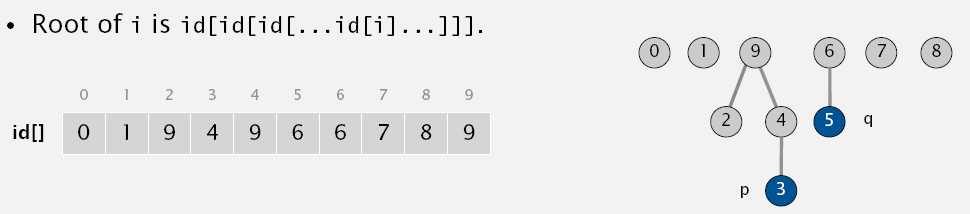

`find`: check if p and q have the same id, involves some work  
`union`: to merge components containing p and q, change id of p's root to id of q's root (only one value changes)

In [9]:
public class QuickUnionUF
{
  private int[] id;
  
  // N array accesses
  public QuickUnionUF(int N)
  {
    id = new int[N];                          // set id of each object to itself
    for (int i = 0; i < N; i++) id[i] = i;    
  }
  
  // i array accesses
  private int root(int i)
  {
    while (i != id[i]) i = id[i];             // chase parent pointers until you reach root
    return i;
  }
  
  // depth of p and q array accesses
  public boolean connected(int p, int q)
  {
    return root(p) == root(q);                // check if p and q have the same root
  }
  
  // depth of p and q array accesses
  public void union(int p, int q)
  {
    int i = root(p);
    int j = root(q);
    id[i] = j;                                // change root of p to root of q
  }
}

This algorithm is too slow. Trees can get very tall.

- initialize: N accesses
- union: N accesses
- find: N accesses

> Quadratic time is much too slow!

## Quick-Union Improvements

### weighted quick-union
always put smaller tree lower

- initialize: N accesses
- union: log(N) accesses
- find: log(N) accesses

In [11]:
public class WeightedQuickUnionUF
{
  private int[] id;
  private int[] iz;
  
  // N array accesses
  public WeightedQuickUnionUF(int N) {
    id = new int[N];
    iz = new int[N];
    for (int i = 0; i < N; i++) {
      id[i] = i;
      iz[i] = 1;
    }
  }
  
  // i array accesses
  private int root(int i) {
    while (i != id[i]) {
      id[i] = id[id[i]];    // path compression
      i = id[i];
    } 
    return i;
  }
  
  // depth of p and q array accesses
  public boolean connected(int p, int q) {
    return root(p) == root(q);                // check if p and q have the same root
  }
  
  // depth of p and q array accesses
  public void union(int p, int q) {
    int i = root(p);
    int j = root(q);
    if (iz[i] < iz[j]) {
      id[i] = j;
      iz[j] += iz[i];
    }
    else {
      id[j] = i;
      iz[i] += iz[j];
    }
  }
}

## Percolation

- N by N grid of sites
- each site is open with probability b (or blocked with probability 1-p)
- system `percolates` iff top and bottom are connected by open sites

model for electricity, fluid flow, and even social interaction.

This problem has not been solved mathematically, but rather via monte-carlo simulations.

Brute force method: percolates iff any site on the bottom row is connected to a site on the top row.

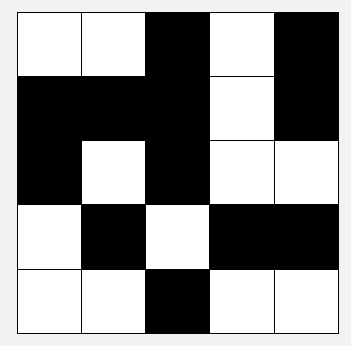

Clever trick: introduce 2 virtual sites and it percolates if the top site connects to bottom site.

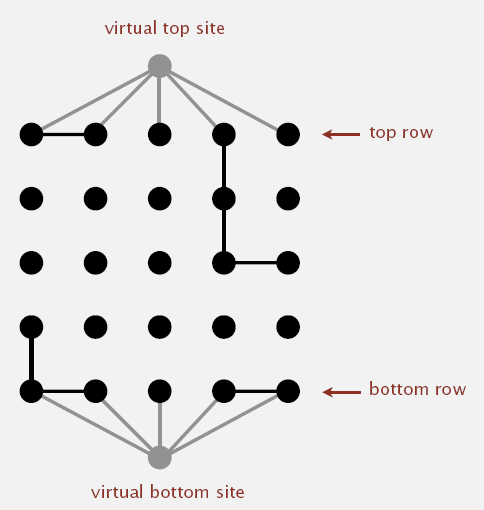

